<a href="https://colab.research.google.com/github/DanielleRomanoff/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/DS43SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron - *A basic unit of computation in a neural network. Called a node or unit. It receives input from some other nodes or external sources.*
- Input Layer - *The layer receives input for the dataset. Might be referred to as the visible layer bcause it's the only part that interacts with the data and is exposed to it.*
- Hidden Layer - *The layers that come after the input layer but before the output layer. Hidden layers cannot be accessed except through the input layer and are not interacted with*
- Output Layer - *This is the final layer. The output layer provides a vector of values. Usually it's modified by an activation function to put it into a format that works for our context.*
- Activation - *The activation function introduces non-linearity into the output. Most of our lives are not linear. Therefore, an activation function takes an output value and performs a mathematical operation on it.*
- Backpropagation - *Improves the accuracy of predictions in data mining and machine learning. Neural Networks use it as an algorithm to find gradient descent with respect to the weights. Here, the weights are updated backwards from output to input.

 YOUR ANSWER HERE

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [0]:
# linear algebra
import numpy as np 
from numpy import array
from numpy import argmax

# data processing
import pandas as pd 

# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns


import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, Nadam
from keras.wrappers.scikit_learn import KerasClassifier


from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, KFold, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [171]:
inputs = np.array([[1, 1, 1, 1],
    [1, 1., 0, 1],
    [1, 0., 1, 1],
    [1, 0, 0, 1]])

# Ideal outputs
correct_outputs = [[1],
    [0],
    [0],
   [0]]

print('Inputs are: \n', inputs)
print('Correct Output is: ',correct_outputs)

Inputs are: 
 [[1. 1. 1. 1.]
 [1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [1. 0. 0. 1.]]
Correct Output is:  [[1], [0], [0], [0]]


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [173]:
# Random weights
weights = 2 * np.random.random((4,1))-1
weights

array([[-0.50773023],
       [-0.40693517],
       [-0.36498742],
       [-0.69987018]])

In [174]:
 # Weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[-1.97952299],
       [-1.61453557],
       [-1.57258782],
       [-1.2076004 ]])

In [175]:
# Activate with sigmoid function
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.1213697 ],
       [0.16595986],
       [0.17184779],
       [0.23012591]])

In [176]:
  # Calculate Error
error = correct_outputs - activated_output
error

array([[ 0.8786303 ],
       [-0.16595986],
       [-0.17184779],
       [-0.23012591]])

In [177]:
# Calculate weight adjustments with sigmoid_derivative
adjustments = error * sigmoid_derivative(activated_output)  # Gradient Descent
adjustments

array([[ 0.21885064],
       [-0.04120559],
       [-0.04264632],
       [-0.05677646]])

In [178]:
 # Update weights
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.42950796],
       [-0.22929012],
       [-0.1887831 ],
       [-0.62164791]])

In [179]:
for iteration in range(500):
  
  # Weighted sum of inputs and weights
  weighted_sum = np.dot(inputs, weights)
  
  # Activate with sigmoid function
  activated_output = sigmoid(weighted_sum)
  
  # Calculate Error
  error = correct_outputs - activated_output
  
  # Calculate weight adjustments with sigmoid_derivative
  adjustments = error * sigmoid_derivative(activated_output)
  
  # Update weights
  weights += np.dot(inputs.T, adjustments)
  
print('Optimized weights after training: ')
print(weights)

print("Output After Training:")
print(activated_output)

Optimized weights after training: 
[[-4.89277504]
 [ 6.41984394]
 [ 6.4198519 ]
 [-5.084915  ]]
Output After Training:
[[9.45834016e-01]
 [2.77638387e-02]
 [2.77640551e-02]
 [4.66993027e-05]]


## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [180]:
# Load data
heart = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [181]:
# Checking for nulls Yay NONE
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


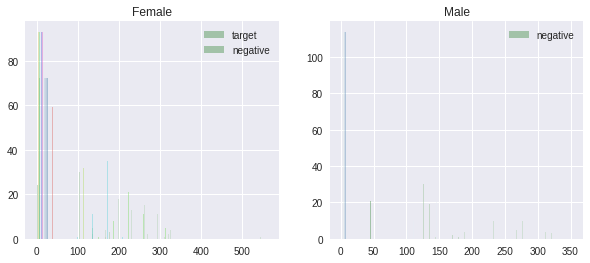

In [186]:
pos_target =  'target'
neg_target =  'negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = heart[heart['sex'] == 0]
men =heart[heart['sex'] == 1]

ax = sns.distplot(women[women['target'] == 1], bins=18, color=sns.diverging_palette(128, 240, n=14) , label = pos_target, ax = axes[0], kde =False)
ax = sns.distplot(women[women['target'] == 0], bins=40, color=sns.diverging_palette(128, 240, n=14), label = neg_target, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
current_palette = sns.color_palette()
ax = sns.distplot(men[men['target'] == 1], bins=18, color=current_palette_14, label = pos_target, ax = axes[0], kde =False)
ax = sns.distplot(men[men['target'] == 0], bins=40, color=sns.diverging_palette(128, 240, n=14) , label = neg_target, ax = axes[1], kde = False )
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


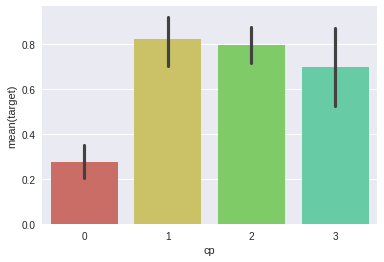

In [187]:
sns.barplot(x='cp', y='target', data=heart)

In [188]:
y = heart['target']
X= heart.drop(['target'], axis=1)
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Confirming correct shapes of data
print("X_train shape is: ", (X_train.shape))
print("X_test shape is: ",(X_test.shape))
print("y_train shape is: ",(y_train.shape))
print("y_trest shape is: ",(y_test.shape))

X_train shape is:  (242, 13)
X_test shape is:  (61, 13)
y_train shape is:  (242,)
y_trest shape is:  (61,)


In [0]:
class Neural_Network(object):
  def __init__(self):
    self.inputs =13
    self.hiddenNodes = 4
    self.outputNodes = 1
    
    # Initlize Weights
    self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (3x4)
    self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (4x1)

In [190]:
NN = Neural_Network()

print("Layer 1 weights: \n", NN.L1_weights)
print("Layer 2 weights: \n", NN.L2_weights)

Layer 1 weights: 
 [[-3.54521916e-01 -1.62847641e+00 -5.61145572e-01 -9.08664273e-01]
 [-5.54690867e-01  1.06835571e+00 -1.23371630e+00  3.26544197e-01]
 [ 1.21132047e+00  4.53728606e-01 -2.96290464e-02  1.94976743e+00]
 [ 1.35318292e-01  1.24805561e-01  6.38011922e-01 -1.15768779e+00]
 [ 4.20497179e-01 -6.83406715e-01 -1.93778857e+00  5.98887621e-01]
 [ 6.54738031e-01  2.77977673e-01  7.14947340e-01 -8.58146452e-02]
 [ 1.33982670e+00  2.20780192e+00  2.46823271e-01  1.19710956e+00]
 [-8.56841516e-01  1.32035098e+00  5.94422212e-01  2.21180703e+00]
 [-1.03471193e+00 -6.80625364e-01 -5.48852925e-01  9.20270660e-01]
 [ 7.64720720e-01 -2.14655405e+00  2.90888243e-01 -5.87342691e-01]
 [ 4.04541356e-02 -2.84164481e+00 -3.47945221e-01  1.08159347e-02]
 [ 7.80430449e-01  2.12999049e-03  9.79055776e-02 -1.14835968e+00]
 [ 4.53734982e-01 -1.51818676e+00 -9.77118635e-01 -3.86725446e-01]]
Layer 2 weights: 
 [[-0.74914759]
 [-0.74686157]
 [ 1.0583499 ]
 [-1.30340621]]


In [0]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = 13
        self.hiddenNodes = 4
        self.outputNodes =1
        
        # Initialize weights
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) #(13x4)
#       self.L2_weights = np.random.randn(self.hiddenNodes, self.hiddenNodes)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)  #(4x1)
    
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations on weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))

In [0]:
NN = Neural_Network()
output = NN.feed_forward(x)
print("output: ", output)

In [0]:
# Backpropogation 
print("Inputs: \n", X)
print("Initial Weights \n", NN.L1_weights)
print("Weighted Sum 1 \n", NN.hidden_sum)
print("Activations from first layer: \n", NN.activated_hidden)
print("Second layer Weights \n", NN.L2_weights)
print("Weighted Sum 2 \n", NN.output_sum)
print("Predictions \n", output)
print("Correct Output: \n", y)

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [194]:
# Load data
heart = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [195]:
# Splitting the data set
y = heart['target']
X= heart.drop(['target'], axis=1)
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Confirming correct shapes of data
print("X_train shape is: ", (X_train.shape))
print("X_test shape is: ",(X_test.shape))
print("y_train shape is: ",(y_train.shape))
print("y_trest shape is: ",(y_test.shape))

X_train shape is:  (242, 13)
X_test shape is:  (61, 13)
y_train shape is:  (242,)
y_trest shape is:  (61,)


In [196]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [0]:
# Normalize the data (all features should have roughly the same scale)
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [0]:
# global hyperparameters

batch_size = 64
epochs = 150

In [0]:
model = Sequential()
model.add(Dense(13, activation='relu', input_shape=(13,)))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='linear'))

In [201]:
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_251 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_252 (Dense)            (None, 13)                182       
_________________________________________________________________
dense_253 (Dense)            (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)

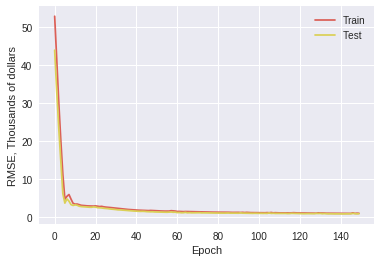

In [203]:
RMSE_train = np.sqrt(history.history['mean_squared_error'])
RMSE_test = np.sqrt(history.history['val_mean_squared_error'])
fig, ax = plt.subplots()
ax.plot(RMSE_train, label = 'Train')
ax.plot(RMSE_test, label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE, Thousands of dollars')
plt.legend()
plt.show()

In [204]:
y_pred = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE from NN: ', RMSE)

RMSE from NN:  1.2148293660998961


In [0]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [206]:
print('RMSE from Linear Regression: ', RMSE)

RMSE from Linear Regression:  0.34098492624865423


In [0]:
# model 
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import Dense, Dropout

def create_model(lr=0.05,
                 activation='relu',                 
                 input_shape=(X_train.shape[1],),
                 optimizer=SGD,
                 relu_alpha = 0.003,
                 dropout_rate = 0.2,
                weight_initializer='random_normal'):
    
    # initialize a model
    model = Sequential()
    
    # add input layer
    model.add(Dense(10, input_shape=input_shape, kernel_initializer=weight_initializer,))
    model.add(LeakyReLU(alpha=relu_alpha)) 
    model.add(Dropout(rate=dropout_rate))

    
    # add hidden layers
    model.add(Dense(10, kernel_initializer=weight_initializer,))
    model.add(LeakyReLU(alpha=relu_alpha)) 
    model.add(Dropout(rate=dropout_rate))
        
    model.add(Dense(10, kernel_initializer=weight_initializer,))
    model.add(LeakyReLU(alpha=relu_alpha)) 
    model.add(Dropout(rate=dropout_rate))
    
    model.add(Dense(8, kernel_initializer=weight_initializer,))
    model.add(LeakyReLU(alpha=relu_alpha)) 
    model.add(Dropout(rate=dropout_rate))

    
    # add final output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # optimizer
    optimizer=optimizer(lr=lr)
    
    # compile model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
              
    return model

In [207]:
# baseline model
epochs = 10
batch_size = 100

model = KerasClassifier(build_fn=create_model, 
                               epochs=epochs,
                               batch_size=batch_size,
                               verbose=1)
kfold = StratifiedKFold(n_splits=3, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)
print(f"K-fold Cross-Val Results - Mean: {results.mean()} StDev: {results.std()} MSE")

Epoch 1/10
202/202 [==============================] - 5s 23ms/step - loss: 0.6933 - acc: 0.5198
Epoch 2/10
202/202 [==============================] - 0s 52us/step - loss: 0.6941 - acc: 0.4554
Epoch 3/10
202/202 [==============================] - 0s 91us/step - loss: 0.6937 - acc: 0.4653
Epoch 4/10
202/202 [==============================] - 0s 59us/step - loss: 0.6921 - acc: 0.5446
Epoch 5/10
202/202 [==============================] - 0s 58us/step - loss: 0.6907 - acc: 0.5446
Epoch 6/10
202/202 [==============================] - 0s 53us/step - loss: 0.6898 - acc: 0.5446
Epoch 7/10
202/202 [==============================] - 0s 63us/step - loss: 0.6907 - acc: 0.5446
Epoch 8/10
202/202 [==============================] - 0s 48us/step - loss: 0.6910 - acc: 0.5446
Epoch 9/10
202/202 [==============================] - 0s 67us/step - loss: 0.6928 - acc: 0.5396
Epoch 10/10
101/101 [==============================] - 2s 18ms/step
Epoch 1/10
202/202 [==============================] - 4s 22ms/step -

In [169]:
# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print(f"Means: {mean}, Stdev: {stdev} with: {param}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 3s 15ms/step - loss: 0.6548 - acc: 0.6832
Epoch 2/20
202/202 [==============================] - 0s 211us/step - loss: 0.6222 - acc: 0.6832
Epoch 3/20
202/202 [==============================] - 0s 191us/step - loss: 0.6512 - acc: 0.6832
Epoch 4/20
202/202 [==============================] - 0s 196us/step - loss: 0.6467 - acc: 0.6832
Epoch 5/20
202/202 [==============================] - 0s 208us/step - loss: 0.6317 - acc: 0.6832
Epoch 6/20
202/202 [==============================] - 0s 190us/step - loss: 0.6599 - acc: 0.6832
Epoch 7/20
202/202 [==============================] - 0s 202us/step - loss: 0.6318 - acc: 0.6832
Epoch 8/20
202/202 [==============================] - 0s 191us/step - loss: 0.6289 - acc: 0.6832
Epoch 9/20
202/202 [==============================] - 0s 192us/step - loss: 0.6384 - acc: 0.6832
Epoch 10/20
202/202 [==============================] - 0s 211us/step - loss: 0.6312 - acc: 0.6832
Epoch 11/20
202/202 [=========